In [1]:
setwd('../../')
source('.Rprofile')
setwd('./benchmark/analysis')

library(ggplot2)
library(stringr)
library(tidyverse)
library(ggpubr)
library(reshape2)
library(patchwork)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ purrr   1.0.0 
✔ tidyr   1.2.1      ✔ dplyr   1.0.10
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [2]:
data <- read_csv('../multi/build_3d.csv')
data$cells <- as.numeric(data$cells)
data <- data[data$global_score > 0,]
data <- data[data$cells == 0,] %>% filter(!method %in% c('SLAT', 'SLAT_harmony', 'PCA')) %>% 
        mutate(method = replace(method, method == 'SLAT_dpca', 'SLAT'))
data$method <- factor(data$method, levels = c('SLAT','PASTE','STAGATE','Harmony','Seurat'))
data$dataset <- str_to_title(data$dataset) %>% str_replace('_', '') %>% str_replace_all('_', '-')
data %>% tail(5)

Rows: 504 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): dataset, method
dbl (8): cells, seed, celltype_score, edge_score, euclidean_dis, global_scor...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


dataset,cells,seed,method,celltype_score,edge_score,euclidean_dis,global_score,region_score,run_time
<chr>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Brain3-cd,0,7,Harmony,0.6097348,-43.31565,0.19281564,0.6097348,0.6097348,8.003976
Brain3-cd,0,7,PASTE,0.8292043,-22.48732,0.05273439,0.8292043,0.8292043,54.673107
Brain3-cd,0,7,SLAT,0.7825707,-34.62839,0.05969232,0.7825707,0.7825707,6.943130
Brain3-cd,0,7,STAGATE,0.7825707,-48.37832,0.06965976,0.7825707,0.7825707,25.078714
Brain3-cd,0,7,Seurat,0.6283882,-45.94171,0.18612919,0.6283882,0.6283882,115.902000


In [3]:
data %>% separate(dataset, into= c('dataset_index', 'slices'), sep ='-') %>% head()

dataset_index,slices,cells,seed,method,celltype_score,edge_score,euclidean_dis,global_score,region_score,run_time
<chr>,<chr>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Brain1,ab,0,0,Harmony,0.6161137,-44.42512,0.21163459,0.6161137,0.6161137,9.650257
Brain1,ab,0,0,PASTE,0.8163507,-22.53223,0.01844558,0.8163507,0.8163507,33.778496
Brain1,ab,0,0,SLAT,0.7665877,-34.01706,0.02496772,0.7665877,0.7665877,7.022252
Brain1,ab,0,0,STAGATE,0.7919431,-45.22227,0.05348030,0.7919431,0.7919431,26.430565
Brain1,ab,0,0,Seurat,0.6004739,-46.16256,0.21946504,0.6004739,0.6004739,157.487000
Brain1,ab,0,1,Harmony,0.6161137,-44.42512,0.21163459,0.6161137,0.6161137,8.896036


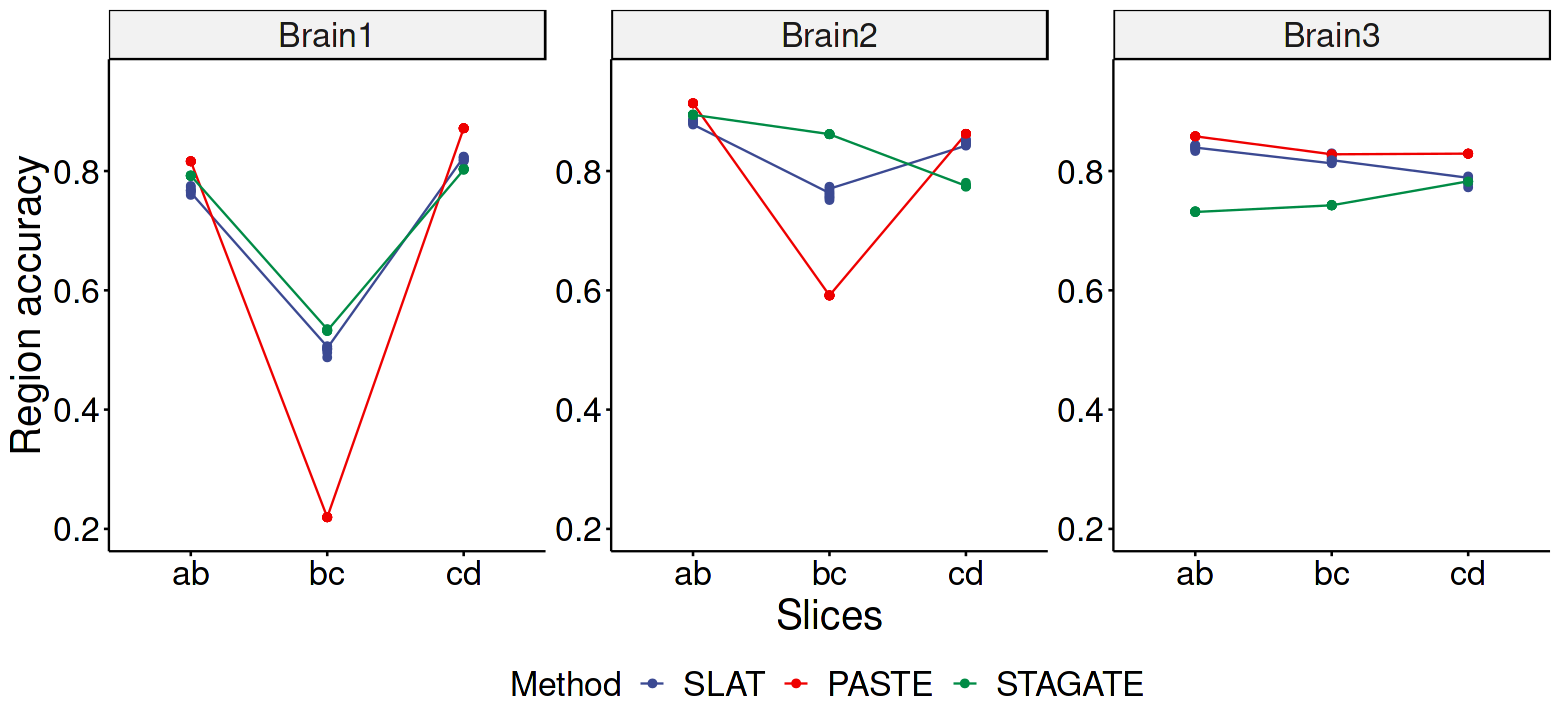

In [4]:
options(repr.plot.width=13, repr.plot.height=6)
data %>% separate(dataset, into= c('dataset_index', 'slices'), sep ='-') %>% filter(!method %in% c('Seurat', 'Harmony')) %>%
ggline(x='slices', y='global_score', color='method', palette = 'aaas',  error.plot="pointrange",
       ylab='Region accuracy', xlab='Slices', font.main=20, legend.title = 'Method') %>%
ggpar(legend='bottom', font.legend=20, font.subtitle=20, font.xtickslab=20, font.ytickslab=20, font.x=24, font.y=24, ylim = c(0.2, 0.95)) + 
 facet_wrap(~dataset_index, scales="free") + 
 theme(strip.text.x=element_text(size=20))

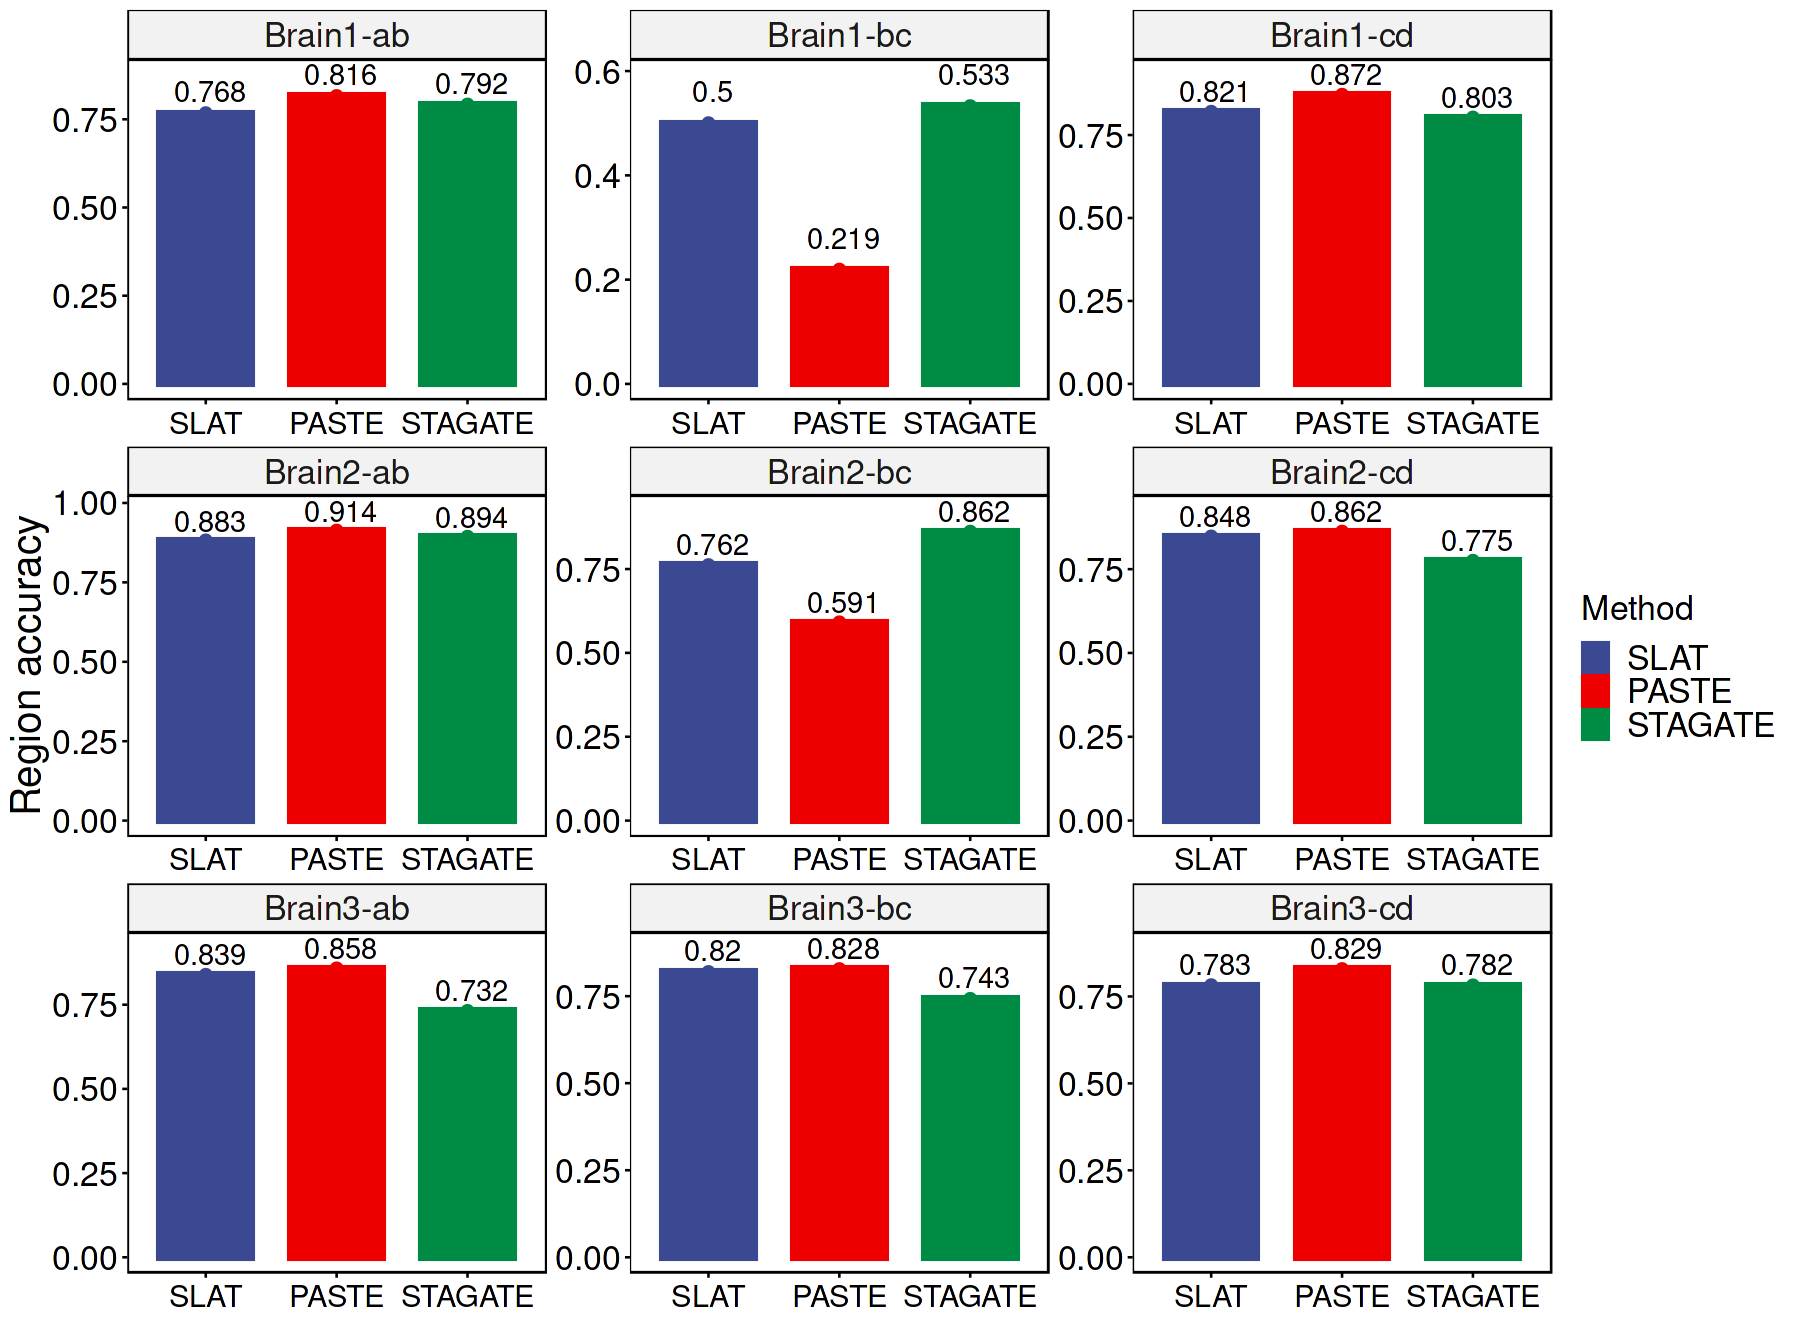

In [15]:
options(repr.plot.width=15, repr.plot.height=11)
data %>% filter(!method %in% c('Seurat', 'Harmony')) %>%
ggbarplot(x="method", y="global_score", fill='method', color='method', add="mean_se", error.plot="pointrange",
        palette='aaas', xlab=F, ylab='Region accuracy', size=1.5, lab.size=6, facet.by='dataset', label = F, label.pos = "out",
        legend.title = 'Method') %>%
ggpar(legend='right', font.legend=20, font.subtitle=20, font.xtickslab=18, font.ytickslab=20, font.y=24) +
stat_summary(fun.data = function(x) data.frame(y = mean(x)+0.06, label = paste("", round(mean(x), 3))), geom="text",size=6) +
facet_wrap(~dataset, scales="free") +
theme(axis.text.x=element_text(angle=0, vjust=0.5, hjust=0.5), strip.text.x=element_text(size=20))


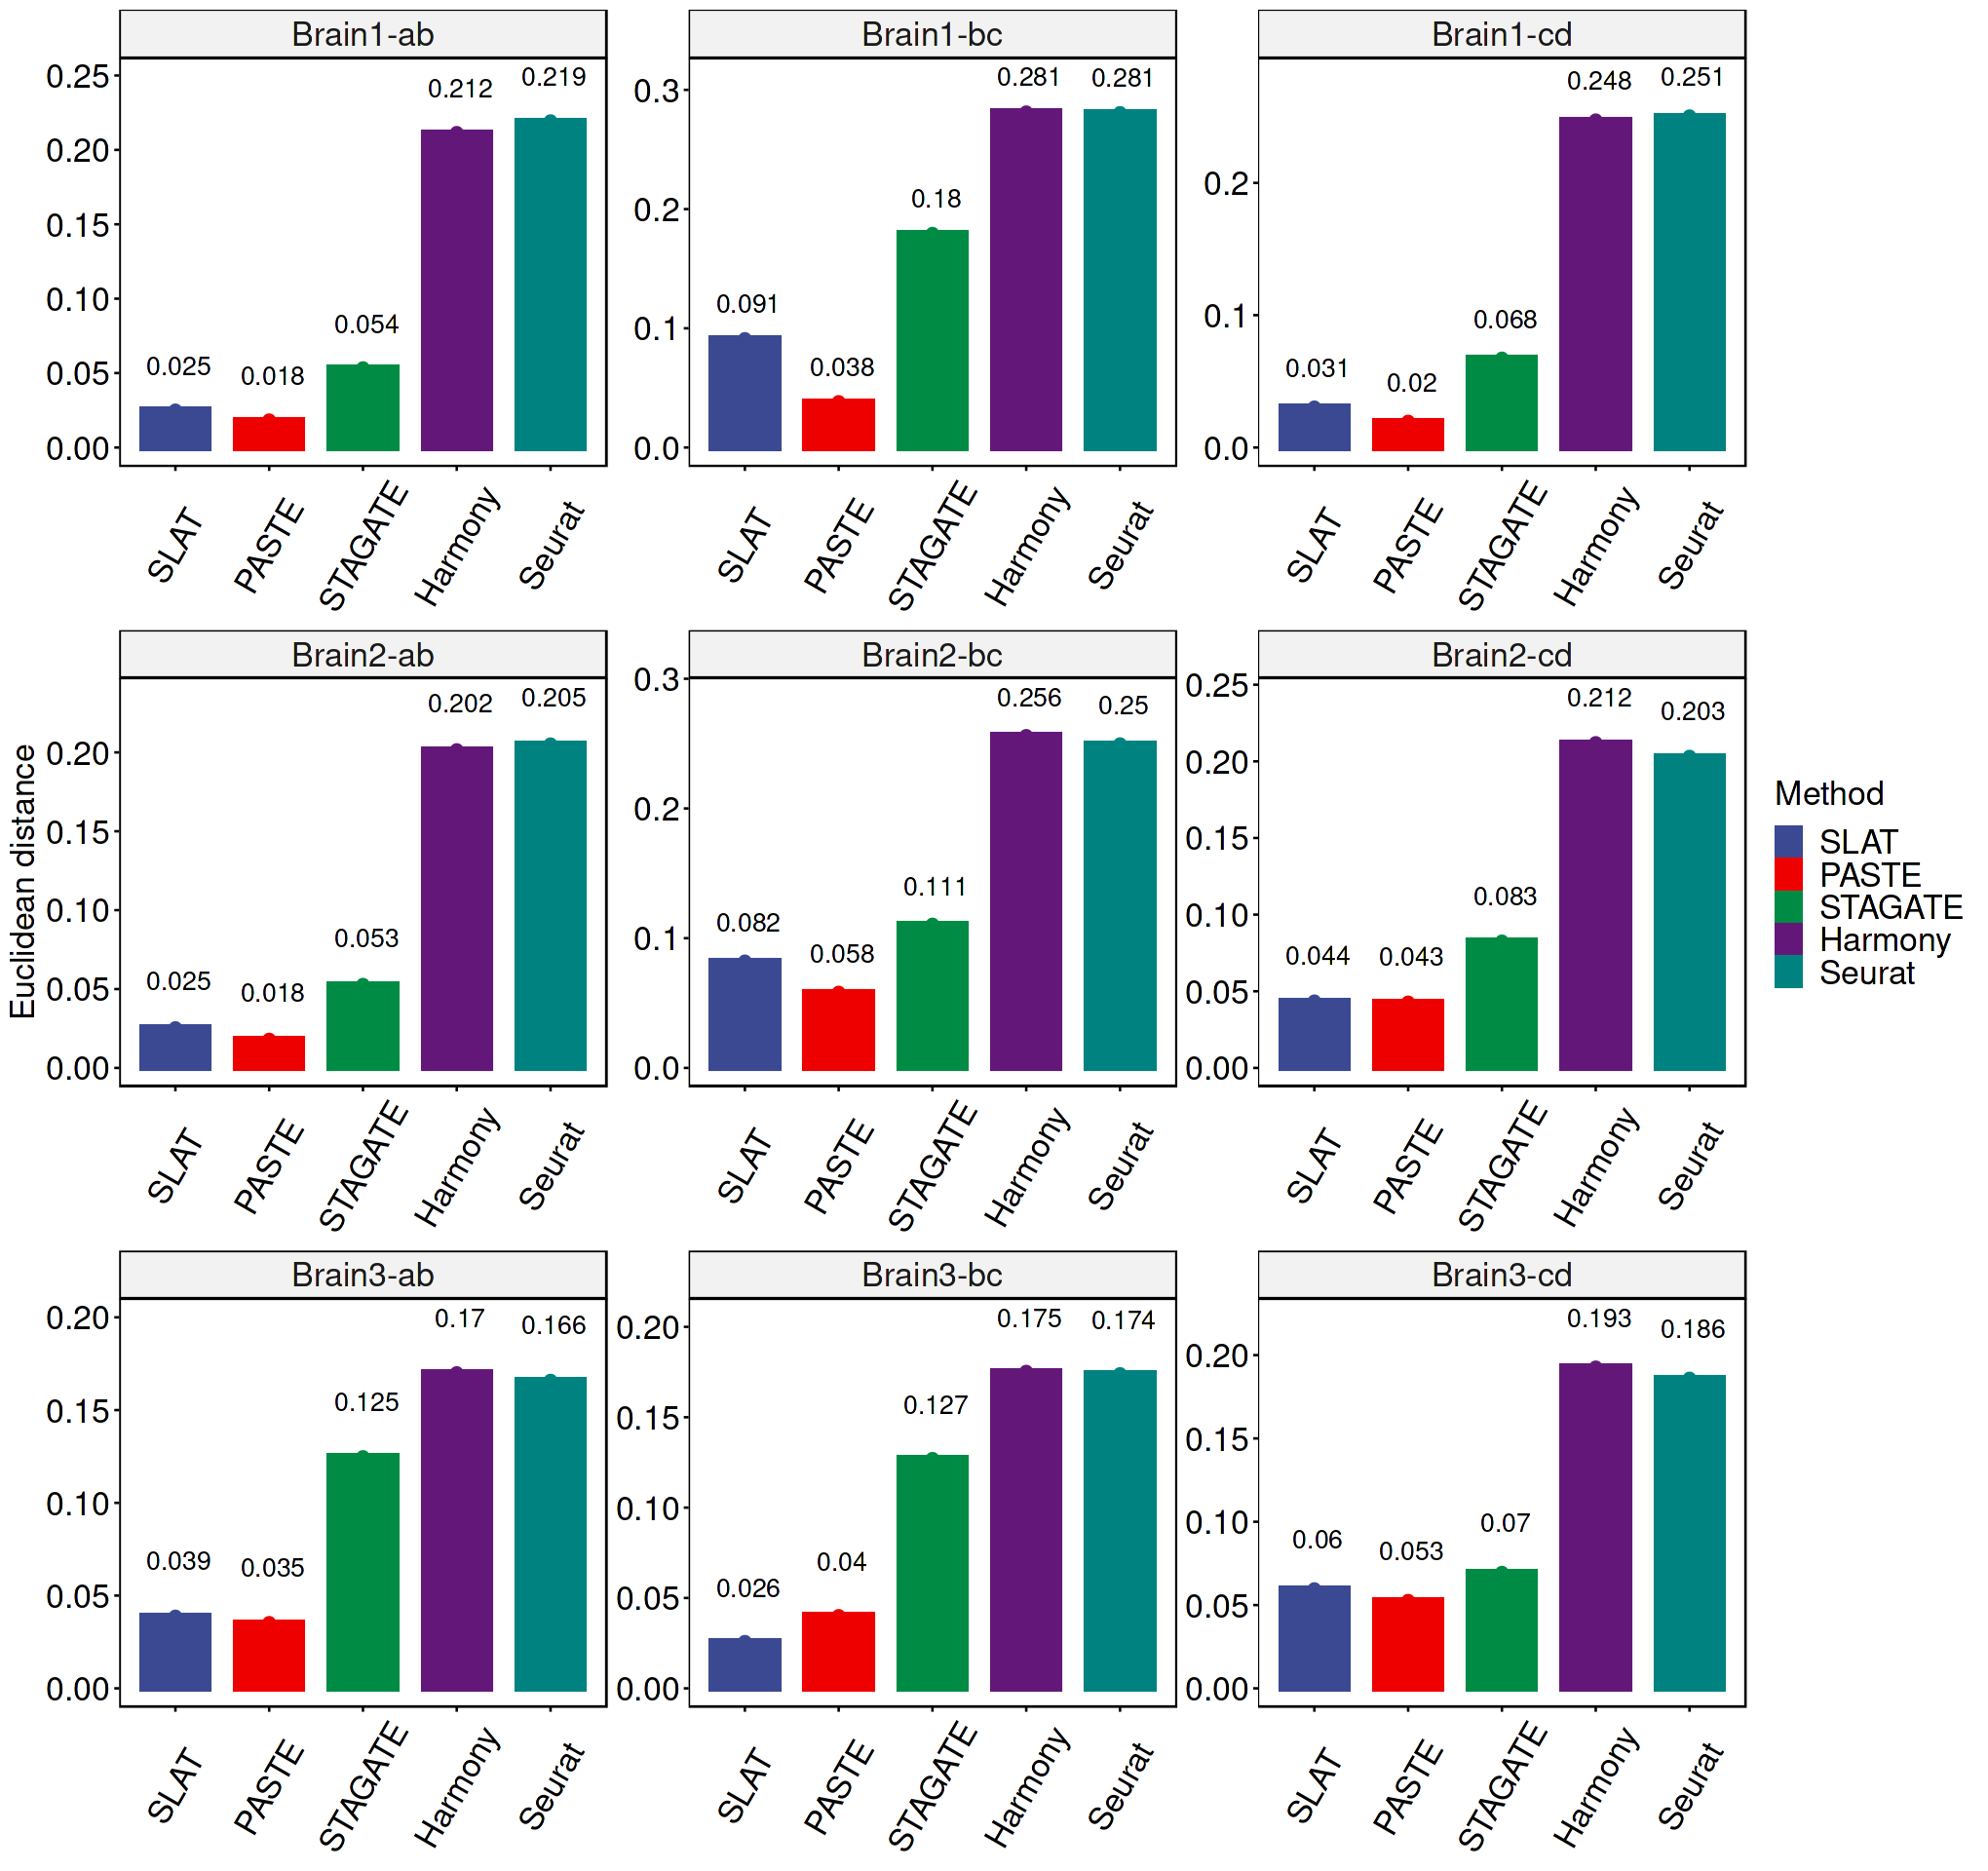

In [6]:
options(repr.plot.width=17, repr.plot.height=16)
ggbarplot(data, x="method", y="euclidean_dis", fill='method', color='method', add="mean_se", error.plot="pointrange",
        palette='aaas', xlab=F ,ylab='Euclidean distance', size=1.5, lab.size=5, facet.by='dataset',label = F, label.pos = "out",
        legend.title = 'Method') %>% 
ggpar(legend='right', font.legend=20, font.subtitle=20, font.xtickslab=20, font.ytickslab=20, font.y=20) +
stat_summary(fun.data = function(x) data.frame(y = mean(x)+0.03, label = paste("", round(mean(x), 3))), geom="text",size=5.5) +
facet_wrap(~dataset, scales="free")+
theme(axis.text.x=element_text(angle=60, vjust=0.5, hjust=0.5), strip.text.x=element_text(size=20))
